In [55]:
import pandas as pd


In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv", header=None, names=["population", "wspeed", "city"])

In [57]:
df

,population,wspeed,city
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


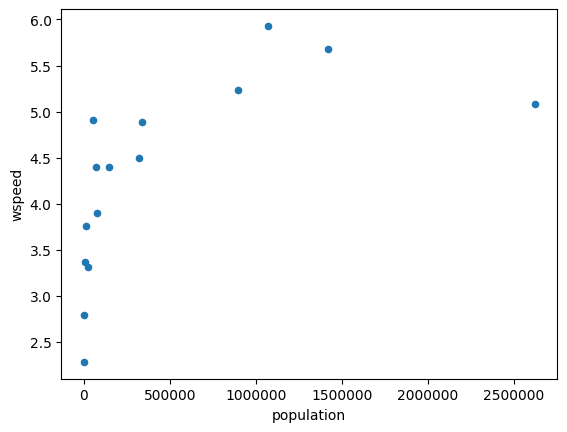

In [58]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.ticklabel_format(style="plain")

In [59]:
import numpy as np

In [60]:
df["population"]=np.log10(df["population"])

Text(0.5, 0, 'log10 population')

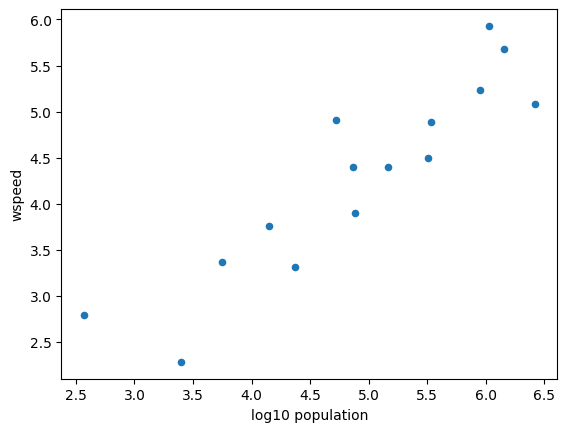

In [61]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("log10 population")

Text(0.5, 0, 'log10 population')

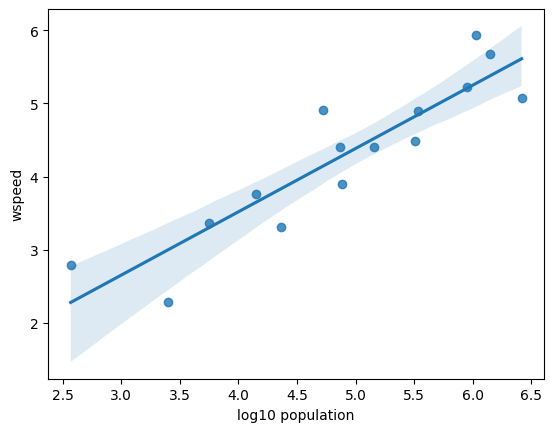

In [62]:
import seaborn as sns
ax = sns.regplot(x=df["population"], y=df["wspeed"])
ax.set_xlabel("log10 population")

In [63]:
def line(x, slope, intercept):
  y = slope * x + intercept
  return y
def SSE(y, ypred):
  return((y - ypred)**2).sum()

In [64]:
current_min_sse = 1e7
for slope in np.arange(0, 3, 0.01):
  for intercept in np.arange(0, 3, 0.01):
    prediction = line(df["population"], slope, intercept)
    sse = SSE(df["wspeed"], prediction)

    if sse < current_min_sse:
      current_min_sse = sse
      manual_slope = slope
      manual_intercept = intercept

print(f"Best Slope: {manual_slope:.2f}")
print(f"Best Intercept: {manual_intercept:.2f}")

Best Slope: 0.87
Best Intercept: 0.03


In [65]:
df["prediction_manual"] = line(df["population"], manual_slope, manual_intercept)

In [66]:
manual_min_sse = SSE(df["wspeed"], df["prediction_manual"])
print(f"Minimum Sum of Squared Errors achieved: {manual_min_sse:.2f}")

Minimum Sum of Squared Errors achieved: 2.76


Text(0, 0.5, 'Walking Speed (ft/s)')

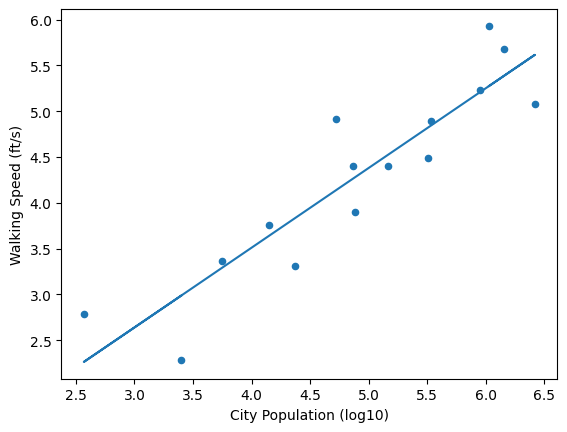

In [67]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [68]:
numpy_slope, numpy_intercept = np.polyfit(df["population"], df["wspeed"], 1)

print(f"NumPy Slope: {numpy_slope:.3f}")
print(f"NumPy Intercept: {numpy_intercept:.3f}")

NumPy Slope: 0.865
NumPy Intercept: 0.057


In [69]:
np.polyfit?

Text(0, 0.5, 'Walking Speed (ft/s)')

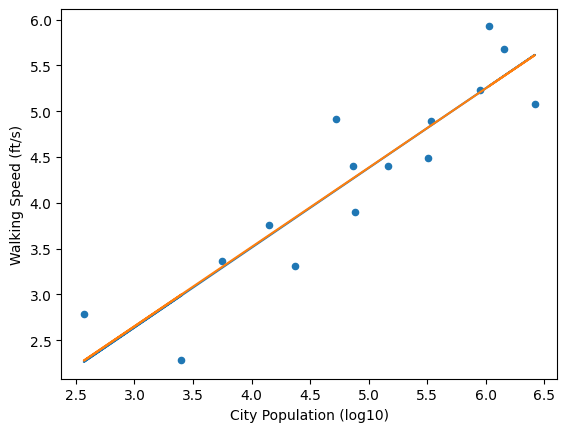

In [70]:
df["prediction_numpy"] = line(df["population"], numpy_slope, numpy_intercept)
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df["population"].values.reshape(-1, 1), df["wspeed"].values)

LinearRegression()

In [72]:
df["population"].values.reshape(-1, 1).shape

(15, 1)

In [73]:
reg.fit(df["population"].values.reshape(-1, 1), df["wspeed"].values)

LinearRegression()

In [74]:
reg.coef_

array([0.8653381])

In [75]:
reg.intercept_

0.05664889151453334

In [76]:
reg.predict(df["population"].values.reshape(-1, 1))

array([3.00001037, 2.27901169, 3.30343936, 3.64712627, 3.83588836,
       4.14189772, 4.26660871, 4.28560323, 4.52297726, 4.8204649 ,
       4.84435204, 5.20740779, 5.61064953, 5.38045839, 5.27410438])

In [77]:
np.sum((reg.predict(df["population"].values.reshape(-1, 1)) - df["wspeed"].values)**2)

2.7581553140056205

In [78]:
score = reg.score(df["population"].values.reshape(-1, 1), df["wspeed"].values)
print(f"Score of linear regression from sklearn: {score:.2f}")

Score of linear regression from sklearn: 0.82


In [79]:
df["prediction_sklearn"] = reg.predict(df["population"].values.reshape(-1, 1))

Text(0, 0.5, 'Walking Speed (ft/s)')

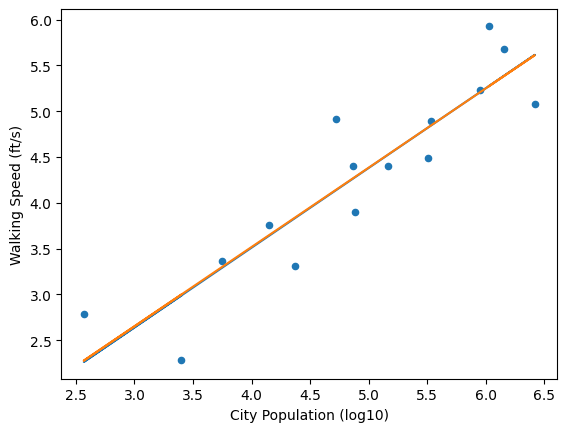

In [80]:
df["prediction_sklearn"] = reg.predict(df["population"].values.reshape(-1, 1))

ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])

ax.plot(df["population"], df["prediction_sklearn"])

ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")